*Часть 1*

**1. Создать массив единиц размерностью 5х2, с целочисленным типом данных.**

In [1]:
import numpy as np

In [2]:
array = np.ones((5,2), dtype=int)
array

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

**2. Создать 2 массива единиц A и B размерностью 2х3. Массив B транспонировать. Выполнить операцию матричного перемножения массивов A и B (транспонированный).**

In [3]:
A = np.ones((2,3))
B = np.ones((2,3))

A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [4]:
B = np.transpose(B)
B

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [5]:
result = np.dot(A, B)
result

array([[3., 3.],
       [3., 3.]])

**3. Создайте массив случайных значений от 0 до 10, размерностью 20. Используя логическую индексацию, вывести массив со значениями больше 5.**

In [6]:
array = np.random.randint(0,10,20)
array

array([6, 3, 7, 1, 9, 4, 7, 2, 2, 5, 7, 1, 5, 9, 7, 9, 4, 5, 9, 2])

In [7]:
result = array[array>5]
result

array([6, 7, 9, 7, 7, 9, 7, 9, 9])

**4. Создать массив случайных значений от 0 до 10, размерностью 3х5. При помощи функции np.where() заменить значения меньше 5 на 0 и значения больше или равно 5 на 1.**

In [8]:
array = np.random.randint(0, 10+1, size=(3, 5))
array

array([[ 7,  0,  9,  3,  2],
       [ 5,  0,  9,  1,  1],
       [ 4,  8,  5, 10,  9]])

In [9]:
new_array = np.where(array < 5, 0, 1)
new_array

array([[1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 1, 1, 1]])

**5. Создать массив единиц размерностью 4х3. Добавить 1 ось в любое место массива.**


In [10]:
array = np.ones((4,3))
array

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [11]:
new_array = np.expand_dims(array, axis=1)
new_array

array([[[1., 1., 1.]],

       [[1., 1., 1.]],

       [[1., 1., 1.]],

       [[1., 1., 1.]]])

**6. Написать код, который вычисляет значение следующей математической функции в зависимости от переменной х, где х - вектор.**

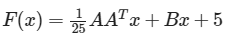

In [12]:
A = np.random.randint(1, 11, size=(4, 4))
B = np.random.randint(1, 11, size=(4, 4))

In [13]:
x = np.random.randint(1, 6, size=4)

In [14]:
F = (1/25) * np.dot(np.dot(A, A.T), x) + np.dot(B, x) + 5
F

array([ 94.52, 124.28, 125.88, 122.76])

**7. Написать функцию, которая находит все точки пересечения заданной одномерной математической функции с осью X и отображает их на графике функции красными кругами.**

In [15]:
import matplotlib.pyplot as plt

In [16]:
def f3(x):
    y = x*x*np.sin(x/300) + 300*x
    return y

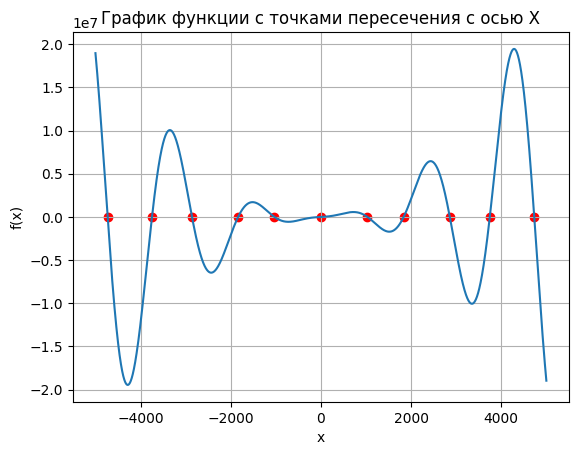

In [18]:
def find_intersections():
    x_values = np.linspace(-5000, 5000, 10000)  # Задаем диапазон значений для поиска точек пересечения
    y_values = f3(x_values)  # Вычисляем значения функции для заданных x

    intersections = []  # Пустой массив для хранения точек пересечения с осью Х

    # Проверяем каждую пару соседних значений на пересечение с осью X
    for i in range(len(y_values) - 1):
        if np.sign(y_values[i]) != np.sign(y_values[i+1]):
            # Нашли точку пересечения, интерполируем значение x для более точного результата
            x_intersection = np.interp(0, [y_values[i], y_values[i+1]], [x_values[i], x_values[i+1]])
            intersections.append(x_intersection)

    return intersections

def plot_function_with_intersections():
    x_values = np.linspace(-5000, 5000, 10000)
    y_values = f3(x_values)  # Вычисляем значения функции для заданных x

    intersections = find_intersections()  # Находим точки пересечения

    plt.plot(x_values, y_values)
    plt.scatter(intersections, [0]*len(intersections), color='red', marker='o')  # Отображаем точки пересечения с осью X
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('График функции с точками пересечения с осью X')
    plt.grid(True)
    plt.show()

plot_function_with_intersections()

**8. Написать функцию, которая получает на вход пару матриц и проверяет закон коммутативности матричного умножения.**

In [26]:
def check_commutativity(matrix1, matrix2):
    # Проверяем закон коммутативности для матриц
    product1 = np.matmul(matrix1, matrix2)
    product2 = np.matmul(matrix2, matrix1)

    if np.array_equal(product1, product2):
        return 1
    else:
        return 0

def experiment(num_experiments):
    successful_trials = 0

    for _ in range(num_experiments):
        # Генерируем случайные целочисленные матрицы размером (5, 5) из отрезка [-5, 5]
        matrix1 = np.random.randint(-5, 6, size=(5, 5))
        matrix2 = np.random.randint(-5, 6, size=(5, 5))

        # Проверяем коммутативность для текущих матриц
        if check_commutativity(matrix1, matrix2) == 1:
            successful_trials += 1

    return successful_trials

In [28]:
num_experiments = 1000
successes = experiment(num_experiments)

print(f"Из {num_experiments} экспериментов успешных срабатываний: {successes}")

Из 1000 экспериментов успешных срабатываний: 0


*Часть 3*

**1. Написать функцию, которая находит две точки: где наклон графика функции самый крутой (в любую сторону), где наклон самый пологий, и отображает на графике функции эти точки зелёным и красным кругом соответственно.**

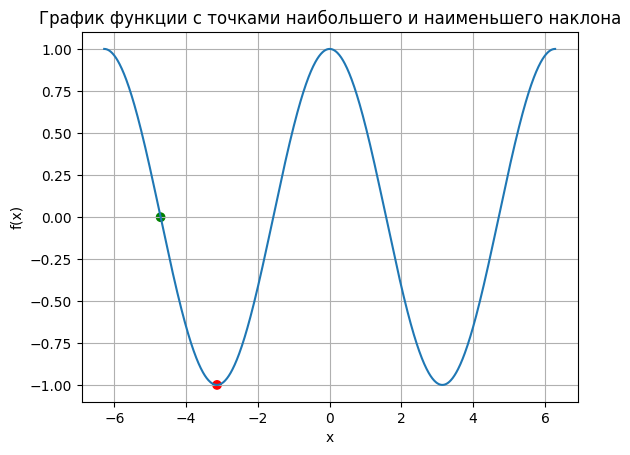

In [30]:
def f(x):
    return np.cos(x)  # Пример функции

def find_steep_and_flat_points():
    x_values = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y_values = f(x_values)

    # Численно вычисляем первую производную функции (наклон)
    derivative = np.gradient(y_values, x_values)

    # Находим индекс точки с максимальным и минимальным значением производной
    index_steep = np.argmax(np.abs(derivative))
    index_flat = np.argmin(np.abs(derivative))

    return x_values[index_steep], x_values[index_flat]

def plot_function_with_points():
    x_values = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y_values = f(x_values)

    steep_point, flat_point = find_steep_and_flat_points()

    plt.plot(x_values, y_values)
    plt.scatter([steep_point, flat_point], [f(steep_point), f(flat_point)], color=['green', 'red'], marker='o')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('График функции с точками наибольшего и наименьшего наклона')
    plt.grid(True)
    plt.show()

plot_function_with_points()

2. Написать функцию, которая находит все экстремумы двумерной функции z = sin(x) * sin(y) в диапазоне [x = -3.14, x = 3.14], [y = -3.14, y = 3.14], а также:

a) Возвращает листы с координатами двумерных точек - 4 листа - локальный и глобальный минимум и максимум.

b) Выводит график такой функции.

In [31]:
def func(x, y):
    return np.sin(x) * np.sin(y)

In [32]:
from scipy.optimize import minimize

In [33]:
def find_extrema():
    # Генерируем сетку значений x и y в указанном диапазоне
    x_values = np.linspace(-np.pi, np.pi, 100)
    y_values = np.linspace(-np.pi, np.pi, 100)
    X, Y = np.meshgrid(x_values, y_values)

    # Вычисляем значения функции в каждой точке сетки
    Z = func(X, Y)

    # Находим глобальный минимум и максимум функции
    res_global_min = minimize(lambda x: -func(*x), (0, 0), bounds=((-np.pi, np.pi), (-np.pi, np.pi)))
    res_global_max = minimize(lambda x: func(*x), (0, 0), bounds=((-np.pi, np.pi), (-np.pi, np.pi)))

    # Находим локальный минимум и максимум функции
    res_local_min = minimize(lambda x: func(*x), (0, 0), method='Nelder-Mead')
    res_local_max = minimize(lambda x: -func(*x), (0, 0), method='Nelder-Mead')

    # Возвращаем координаты экстремумов
    return [(res_local_min.x[0], res_local_min.x[1]), (res_local_max.x[0], res_local_max.x[1]),
            (res_global_min.x[0], res_global_min.x[1]), (res_global_max.x[0], res_global_max.x[1])]

In [34]:
def plot_function():
    # Генерируем сетку значений x и y в указанном диапазоне
    x_values = np.linspace(-np.pi, np.pi, 100)
    y_values = np.linspace(-np.pi, np.pi, 100)
    X, Y = np.meshgrid(x_values, y_values)

    # Вычисляем значения функции в каждой точке сетки
    Z = func(X, Y)

    # Строим график функции
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('График функции z = sin(x) * sin(y)')
    plt.show()

Координаты экстремумов:
Локальный минимум: (1.570841047126256, -1.5708017274524189)
Локальный максимум: (1.5707715466547667, 1.5707757838754546)
Глобальный минимум: (0.0, 0.0)
Глобальный максимум: (0.0, 0.0)


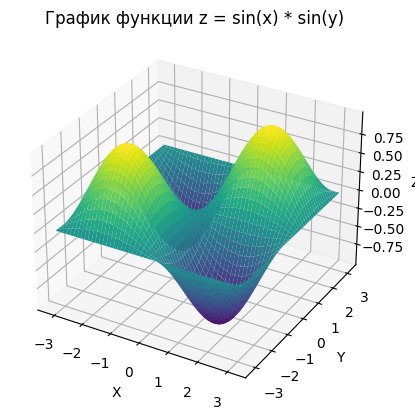

In [35]:
extrema = find_extrema()
print("Координаты экстремумов:")
print("Локальный минимум:", extrema[0])
print("Локальный максимум:", extrema[1])
print("Глобальный минимум:", extrema[2])
print("Глобальный максимум:", extrema[3])

plot_function()